<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Kezhan_Ghalia_1_1_Variables_num%C3%A9riques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalisation des données numériques


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("https://dataks.bitbucket.io/ml/houses.csv")

## Normalisation min max



$$
x_i' = \frac{x_i - min(x)}{max(x) - min(x)}
$$

In [2]:
import numpy as np
from sklearn import preprocessing

# exemple de données
feature = np.array([
    [-50],
    [-10],
    [0],
    [10],
    [20]
])

# utiliser un "normalisateur"

minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# normalisation
scaled_feature = minmax_scaler.fit_transform(feature)

scaled_feature

array([[0.        ],
       [0.57142857],
       [0.71428571],
       [0.85714286],
       [1.        ]])

**Question** vérifier à la main le calcul effectué par la fonction `MinMaxScaler`

In [5]:
minElt = feature.min()
maxElt = feature.max()
for elt in feature:
  xElt = (elt - minElt) / (maxElt - minElt)
  print(xElt)


[0.]
[0.57142857]
[0.71428571]
[0.85714286]
[1.]


## Centrer-réduction

$$
x_i' = \frac{x_i - \bar x}{\sigma}
$$

In [6]:
import numpy as np
from sklearn import preprocessing

# exemple de données
feature = np.array([
    [-10],
    [-20],
    [50],
    [60],
    [90]
])

# centrer reduction
scaler = preprocessing.StandardScaler()

# application
standardized = scaler.fit_transform(feature)

standardized

array([[-1.04173019],
       [-1.27848705],
       [ 0.37881098],
       [ 0.61556784],
       [ 1.32583843]])

In [7]:
print("Mean {}".format(round(standardized.mean())))
print("Standard Deviation: {}".format(standardized.std()))

Mean -0.0
Standard Deviation: 1.0


**Question** vérifier à la main le calcul effectué par la fonction `StandardScaler`

In [10]:
for elt in feature:
    xElt = ((elt - feature.mean()) / feature.std())
    print(xElt)

[-1.04173019]
[-1.27848705]
[0.37881098]
[0.61556784]
[1.32583843]


## Autres méthodes de normalisation

$$x'=\frac{x-médiane}{Q(75\%)-Q(25\%)}$$

Pour d'autres méthodes, vous pouvez consulter



https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html



In [11]:

robust_scaler = preprocessing.RobustScaler()

robust_scaler.fit_transform(feature)


array([[-0.85714286],
       [-1.        ],
       [ 0.        ],
       [ 0.14285714],
       [ 0.57142857]])

In [12]:
preprocessing.StandardScaler().fit_transform(feature)


array([[-1.04173019],
       [-1.27848705],
       [ 0.37881098],
       [ 0.61556784],
       [ 1.32583843]])

## Normalisation des observations

$$
||x||_1 = \sum_{i=1}^n{|x_i|}
$$

$$
||x||_2 = \sqrt{x_1^2 + x_2^2 + ... + x_n^2}
$$

In [14]:
import numpy as np
from sklearn.preprocessing import Normalizer

features = np.array([
    [0.5, 0.5],
    [1.1, 3.4],
    [1.5, 20.2],
    [1.63, 34.4],
    [10.9, 3.3]
])

normalizer = Normalizer(norm="l2")

normalizer.transform(features)

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

**Question** vérifier que la norme 2 de toutes les observations dans la matrice transformée sont bien égales à 1.

In [22]:
xElt = 0
for elt in features:
  xElt += elt[0]**2
  xElt += elt[1]**2
elt2 = np.sqrt(xElt)
print(elt2)

41.70463883071042


**Question** tester le `Normalizer` avec `l1`, et vérifier la norme de la matrice transformée.

In [23]:
normalizer = Normalizer(norm="l1")

normalizer.transform(features)

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

# Gestion des données manquantes

## Suppression des données manquantes

In [24]:
import numpy as np

features = np.array([
    [1.1, 11.1],
    [2.2, 22.2],
    [3.3, 33.3],
    [np.nan, 55]
])


features[~np.isnan(features).any(axis=1)]

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3]])

In [25]:
import pandas as pd
df = pd.DataFrame(features, columns=["feature_1", "feature_2"])
df.dropna()

,feature_1,feature_2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3


## Remplacer les valeurs manquantes


In [27]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train=[[1, 2], [np.nan, 3], [7, 6]]

print(X_train)
imp.fit(X_train)

X_test = [[np.nan, 2], [6, np.nan], [7, 6]]

print(imp.transform(X_test))

[[1, 2], [nan, 3], [7, 6]]
[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


## K plus proches voisins

In [28]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, weights="uniform")

X = np.array([[0, 2.10],
            [1, 1.18],
            [0, 1.22],
            [1, -0.21]])

X_with_nan = np.array([[np.nan, 0.87],
                      [1, -0.67]])


imputer.fit(X)


imputer.transform(X_with_nan)

array([[ 0.66666667,  0.87      ],
       [ 1.        , -0.67      ]])

**Question** implémenter l'algorithme de KNN pour retrouver les résultats de `KNNImputer`. Noter que `KNNImputer` calcule la moyenne des voisins, ce qui correspond à un modèle de régression.

In [35]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsRegressor(n_neighbors = 2)
clf = clf.fit(X,X)
clf.score(X,X)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.6998761340430517

Lire cet article pour comprendre l'effet de dicrétisation sur les variables continues: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization.html


# Discrétisation

## Uniforme

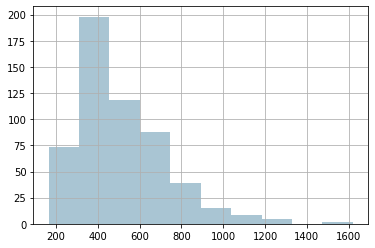

In [36]:

data['lotsize'].hist(color='#A9C5D3')



In [37]:
from sklearn.preprocessing import KBinsDiscretizer

In [38]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform',encode="ordinal")
kb.fit(data[["lotsize"]])
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([ 165. ,  310.5,  456. ,  601.5,  747. ,  892.5, 1038. , 1183.5,
       1329. , 1474.5, 1620. ])]


In [39]:
X_binned = kb.transform(data[["lotsize"]])
X_binned

array([[2.],
       [1.],
       [0.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [3.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [3.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [4.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [1.],
       [5.],
       [1.],
       [1.],
       [1.],
       [0.],
       [3.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [40]:
X = [[-2, 1, -4,   -1],
     [-1, 2, -3, -0.5],
     [ 0, 3, -2,  0.5],
     [ 1, 4, -1,    2]]
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(X)

Xt = est.transform(X)
Xt

array([[0., 0., 0., 0.],
       [1., 1., 1., 0.],
       [2., 2., 2., 1.],
       [2., 2., 2., 2.]])

## Quantiles

In [41]:
kb = KBinsDiscretizer(n_bins=4, strategy='quantile',encode='ordinal')
kb.fit(data[["lotsize"]])
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([ 165.,  360.,  460.,  636., 1620.])]


In [42]:
X_binned = kb.transform(data[["lotsize"]])
X_binned

array([[2.],
       [1.],
       [0.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [3.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [3.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [1.],
       [3.],
       [1.],
       [1.],
       [1.],
       [0.],
       [3.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

## Intervalles personnalisés

In [43]:
data["lotsize"].max()

1620

In [44]:
bin_ranges = [0, 30, 60, 100, 200, 500,2000]
bin_names = [1, 2, 3, 4, 5,6]

data['lotsize_bin_custom_range'] = pd.cut(np.array(data['lotsize']), 
                                               bins=bin_ranges)
data['lotsize_bin_custom_label'] = pd.cut(np.array(data['lotsize']), 
                                               bins=bin_ranges, labels=bin_names)


In [45]:
data[["lotsize","lotsize_bin_custom_range","lotsize_bin_custom_label"]].head()

,lotsize,lotsize_bin_custom_range,lotsize_bin_custom_label
0,585,"(500, 2000]",6
1,400,"(200, 500]",5
2,306,"(200, 500]",5
3,665,"(500, 2000]",6
4,636,"(500, 2000]",6


**Question** implémenter vous-mêmes la fonction `KBinsDiscretizer` avec la stratégie `quantile` à l'aide de la fonction de discrétisation personnalisée.

In [56]:
kb = KBinsDiscretizer(n_bins=4, strategy='quantile',encode='ordinal')
kb.fit(data[["lotsize"]])
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([ 165.,  360.,  460.,  636., 1620.])]


# Regrouper les données avec le clustering

In [57]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

features, _ = make_blobs(n_samples = 50,
                         n_features = 2,
                         centers = 3,
                         random_state = 1)

df = pd.DataFrame(features, columns=["feature_1", "feature_2"])

# créer le modèle de clustering avec kmeans
clusterer = KMeans(3, random_state=0)

# entrainer le kmeans
clusterer.fit(features)

# prédire les clusters
df['group'] = clusterer.predict(features)

df.head()

,feature_1,feature_2,group
0,-9.877554,-3.336145,2
1,-7.287210,-8.353986,0
2,-6.943061,-7.023744,0
3,-7.440167,-8.791959,0
4,-6.641388,-8.075888,0


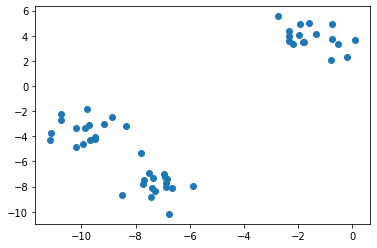

In [58]:
import matplotlib.pyplot as plt

plt.scatter(df["feature_1"],df["feature_2"])

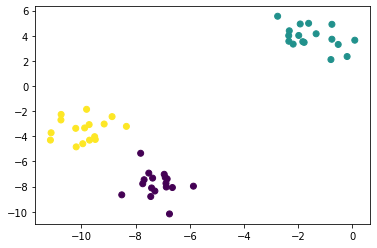

In [59]:
plt.scatter(df["feature_1"],df["feature_2"],c=df["group"])

# Transformation log

## Analyse de la distribution

In [60]:
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats
import numpy as np


In [ ]:
print("Skewness: %f" % data['price'].skew())
print("Kurtosis: %f" % data['price'].kurt())


Skewness: 1.209829
Kurtosis: 1.959740


In [61]:
(mu, sigma) = norm.fit(data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))



 mu = 681215.97 and sigma = 266782.07



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


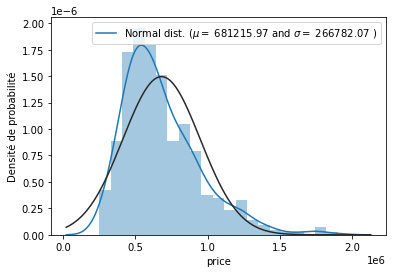

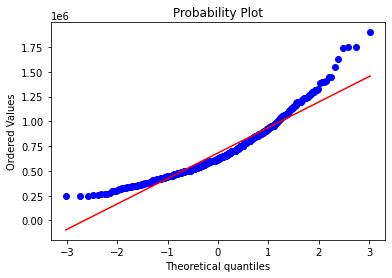

In [62]:
# On visualise l'histogramme

sns.distplot(data['price'], fit=norm);

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Densité de probabilité')
fig = plt.figure()
res = stats.probplot(data['price'],plot=plt)
plt.show()


## Transformation log

In [63]:
data['log_price'] = np.log(data['price'])

In [64]:
(mu, sigma) = norm.fit(data['log_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 13.36 and sigma = 0.37



In [65]:
print("Skewness: %f" % data['log_price'].skew())
print("Kurtosis: %f" % data['log_price'].kurt())

Skewness: 0.137613
Kurtosis: -0.137420


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


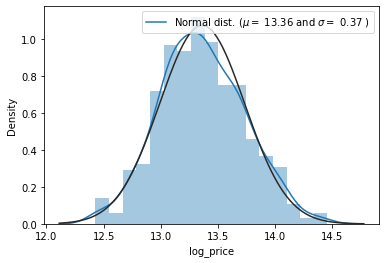

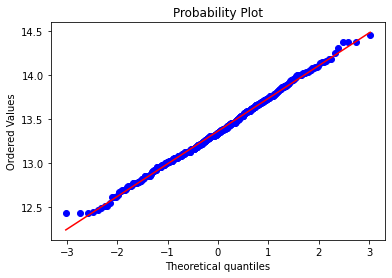

In [66]:
# On visualise l 'histogramme
sns.distplot(data['log_price'], fit=norm);

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

fig = plt.figure()
res = stats.probplot(data['log_price'],plot=plt)
plt.show()


# Exercice

**Question** construire la régression linéaire sur les ventes immobilières après une transformation log de la variable `price`.

Comparer la performance de modèle.

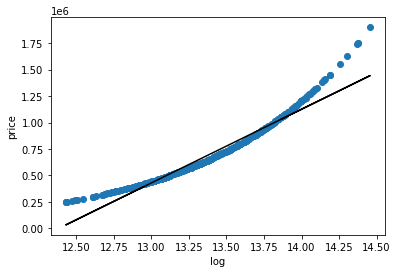

In [67]:
x = data[["log_price"]]
y = data[["price"]]
# importer le package qui contient le modèle linéaire
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# créer le modèle
model = LinearRegression()
# entraîner le modèle
model.fit(x,y)

plt.scatter(x,y)
plt.plot(x,model.predict(x),color = "black")
plt.xlabel('log')
plt.ylabel('price')
plt.show()